In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visual styles
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
%matplotlib inline

# Load Titanic dataset directly from seaborn
df = sns.load_dataset('titanic')

# Alternative: Load from CSV if you have it
# df = pd.read_csv('titanic.csv')

print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")

Dataset loaded successfully!
Shape: (891, 15)

Columns: ['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive', 'alone']


In [10]:
print("=== FIRST LOOK AT TITANIC DATA ===")
print("\n1. First 5 rows:")
print(df.head())

print("\n2. Dataset Info:")
print(df.info())

print("\n3. Basic Statistics:")
print(df.describe())

print("\n4. Missing Values Count:")
print(df.isnull().sum())

print("\n5. Data Types:")
print(df.dtypes)

=== FIRST LOOK AT TITANIC DATA ===

1. First 5 rows:
   survived  pclass     sex    age  sibsp  parch   fare embarked  class  \
0         0       3    male 22.000      1      0  7.250        S  Third   
1         1       1  female 38.000      1      0 71.283        C  First   
2         1       3  female 26.000      0      0  7.925        S  Third   
3         1       1  female 35.000      1      0 53.100        S  First   
4         0       3    male 35.000      0      0  8.050        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

2. Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  -

In [11]:
print("=== FEATURE UNDERSTANDING ===")
print("\nColumn Descriptions:")
print("""
- survived: Target variable (0 = No, 1 = Yes)
- pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- sex: Gender
- age: Age in years
- sibsp: # of siblings/spouses aboard
- parch: # of parents/children aboard
- fare: Passenger fare
- embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
- class: Same as pclass but as category
- who: man, woman, child
- adult_male: Boolean
- deck: Cabin deck (A-G)
- embark_town: Port name
- alive: Same as survived but as string
- alone: Boolean
""")

=== FEATURE UNDERSTANDING ===

Column Descriptions:

- survived: Target variable (0 = No, 1 = Yes)
- pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
- sex: Gender
- age: Age in years
- sibsp: # of siblings/spouses aboard
- parch: # of parents/children aboard
- fare: Passenger fare
- embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
- class: Same as pclass but as category
- who: man, woman, child
- adult_male: Boolean
- deck: Cabin deck (A-G)
- embark_town: Port name
- alive: Same as survived but as string
- alone: Boolean



In [12]:
print("=== MISSING VALUE ANALYSIS ===")

# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis', 
            xticklabels=df.columns, cmap='RdYlGn_r')
plt.title('Missing Values Heatmap (Red = Missing)', fontsize=14, pad=20)
plt.tight_layout()
plt.show()

# Calculate missing percentage
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({
    'column': df.columns,
    'missing_count': df.isnull().sum(),
    'missing_percent': missing_percent
}).sort_values('missing_percent', ascending=False)

print("\nMissing Values Summary:")
print(missing_df[missing_df['missing_count'] > 0])

# Handle missing values
print("\nHandling missing values...")

# Age - Fill with median based on passenger class and sex
df['age'] = df.groupby(['pclass', 'sex'])['age'].transform(
    lambda x: x.fillna(x.median()))

# Embarked - Only 2 missing, fill with mode
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])

# Deck - Too many missing (77%), create flag instead
df['has_deck'] = df['deck'].notnull().astype(int)
df = df.drop('deck', axis=1)  # Drop original deck column

print(f"Missing values after treatment: {df.isnull().sum().sum()}")

=== MISSING VALUE ANALYSIS ===


SyntaxError: keyword argument repeated: cmap (1636430882.py, line 6)

<Figure size 1200x600 with 0 Axes>

=== TARGET VARIABLE: SURVIVED ===


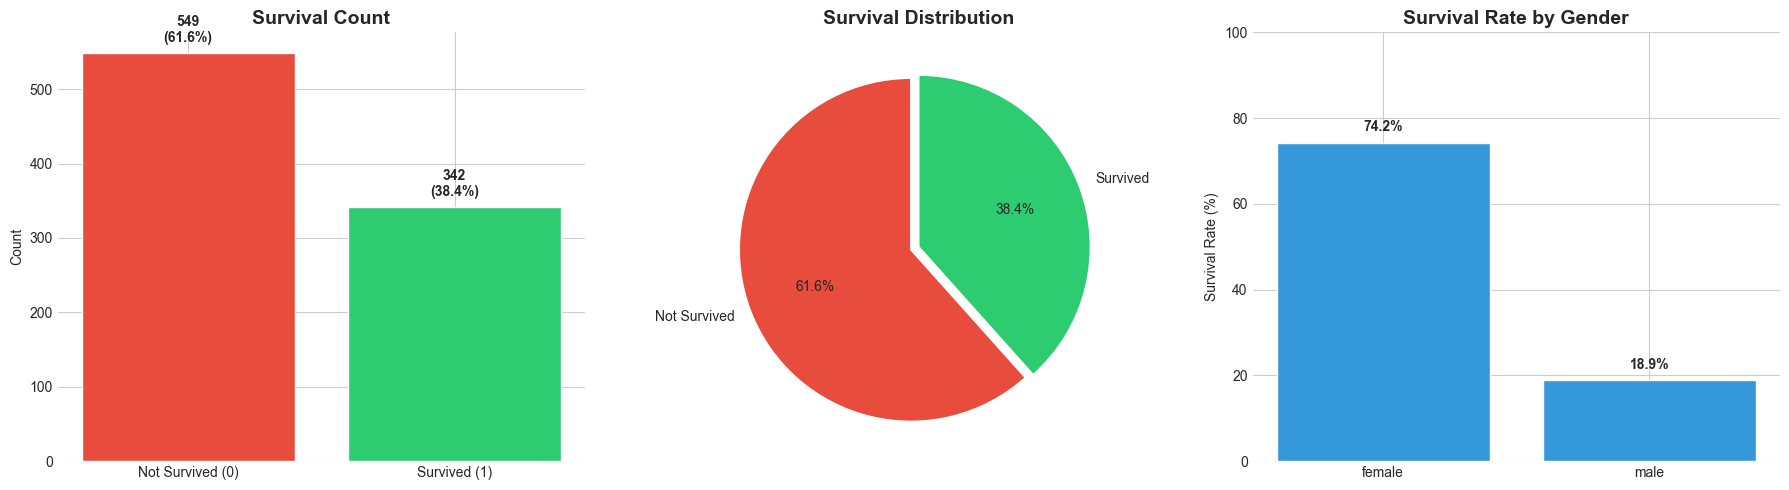


Overall Survival Rate: 38.4%

Survival by Gender:
survived      0      1
sex                   
female   25.796 74.204
male     81.109 18.891


In [13]:
print("=== TARGET VARIABLE: SURVIVED ===")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Count plot
survival_counts = df['survived'].value_counts()
bars1 = axes[0].bar(['Not Survived (0)', 'Survived (1)'], survival_counts.values, 
                    color=['#e74c3c', '#2ecc71'])
axes[0].set_title('Survival Count', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Count')
for bar, count in zip(bars1, survival_counts.values):
    height = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2., height + 10,
                f'{count}\n({count/len(df)*100:.1f}%)', 
                ha='center', va='bottom', fontweight='bold')

# 2. Pie chart
axes[1].pie(survival_counts.values, labels=['Not Survived', 'Survived'],
            autopct='%1.1f%%', colors=['#e74c3c', '#2ecc71'],
            explode=[0.05, 0], startangle=90)
axes[1].set_title('Survival Distribution', fontsize=14, fontweight='bold')

# 3. Survival by gender (key insight)
survival_by_sex = pd.crosstab(df['sex'], df['survived'], normalize='index') * 100
bars2 = axes[2].bar(survival_by_sex.index, survival_by_sex[1], color='#3498db')
axes[2].set_title('Survival Rate by Gender', fontsize=14, fontweight='bold')
axes[2].set_ylabel('Survival Rate (%)')
axes[2].set_ylim([0, 100])
for bar, rate in zip(bars2, survival_by_sex[1]):
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width()/2., height + 2,
                f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nOverall Survival Rate: {df['survived'].mean()*100:.1f}%")
print(f"\nSurvival by Gender:")
print(survival_by_sex)

=== NUMERICAL FEATURES ANALYSIS ===

AGE:
  Min: 0.42
  Max: 80.00
  Mean: 29.70
  Median: 28.00
  Std: 14.53
  Skewness: 0.39

FARE:
  Min: 0.00
  Max: 512.33
  Mean: 32.20
  Median: 14.45
  Std: 49.69
  Skewness: 4.79

SIBSP:
  Min: 0.00
  Max: 8.00
  Mean: 0.52
  Median: 0.00
  Std: 1.10
  Skewness: 3.70

PARCH:
  Min: 0.00
  Max: 6.00
  Mean: 0.38
  Median: 0.00
  Std: 0.81
  Skewness: 2.75


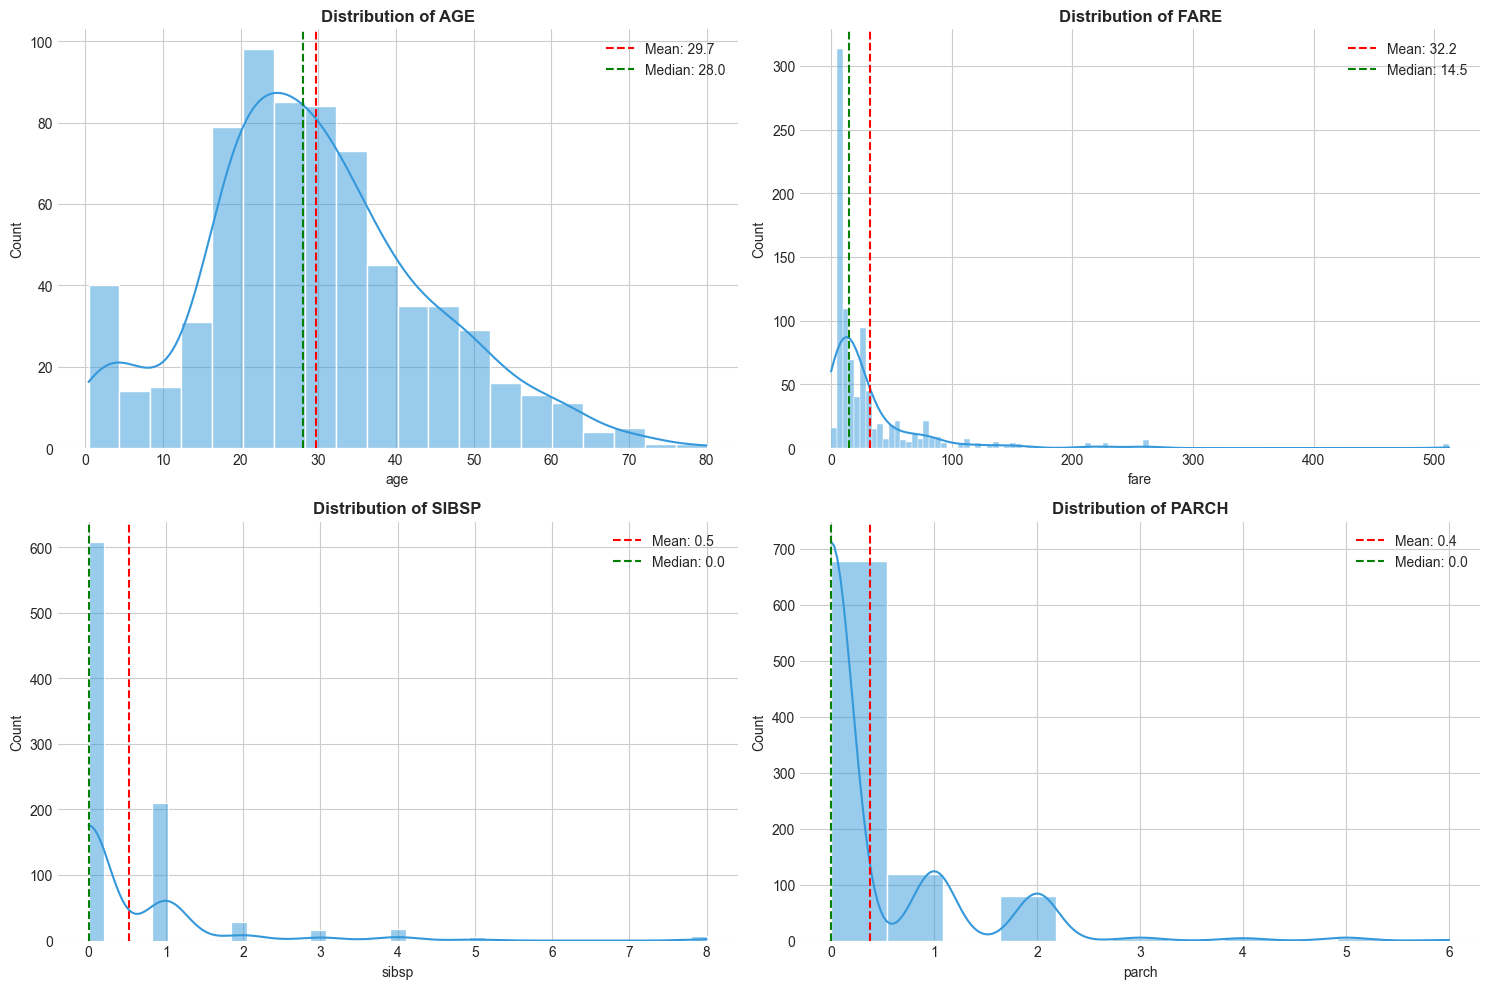


age outliers: 11 (1.2%)

fare outliers: 116 (13.0%)

sibsp outliers: 46 (5.2%)

parch outliers: 213 (23.9%)


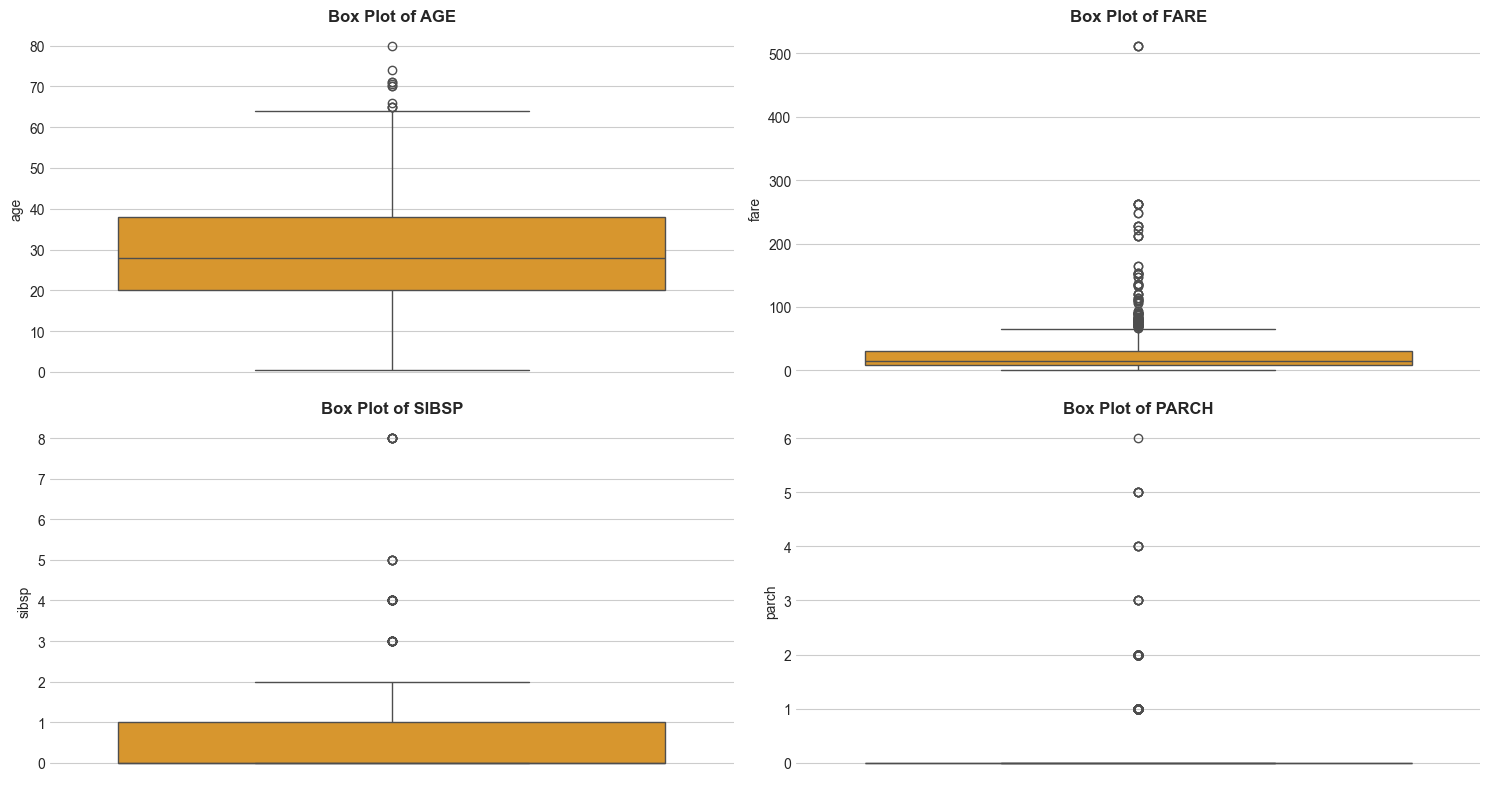

In [14]:
print("=== NUMERICAL FEATURES ANALYSIS ===")

num_cols = ['age', 'fare', 'sibsp', 'parch']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, col in enumerate(num_cols):
    # Histogram with KDE
    sns.histplot(data=df, x=col, kde=True, ax=axes[idx], color='#3498db')
    axes[idx].axvline(df[col].mean(), color='red', linestyle='--', 
                      label=f'Mean: {df[col].mean():.1f}')
    axes[idx].axvline(df[col].median(), color='green', linestyle='--', 
                      label=f'Median: {df[col].median():.1f}')
    axes[idx].set_title(f'Distribution of {col.upper()}', fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].legend()
    
    # Print statistics
    print(f"\n{col.upper()}:")
    print(f"  Min: {df[col].min():.2f}")
    print(f"  Max: {df[col].max():.2f}")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Std: {df[col].std():.2f}")
    print(f"  Skewness: {df[col].skew():.2f}")

plt.tight_layout()
plt.show()

# Box plots for outlier detection
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
axes = axes.ravel()

for idx, col in enumerate(num_cols):
    sns.boxplot(data=df, y=col, ax=axes[idx], color='#f39c12')
    axes[idx].set_title(f'Box Plot of {col.upper()}', fontweight='bold')
    axes[idx].set_ylabel(col)
    
    # Detect outliers using IQR
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"\n{col} outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")

plt.tight_layout()
plt.show()

=== CATEGORICAL FEATURES ANALYSIS ===

PCLASS:
  3: 491 (55.1%)
  1: 216 (24.2%)
  2: 184 (20.7%)

SEX:
  male: 577 (64.8%)
  female: 314 (35.2%)

EMBARKED:
  S: 644 (72.3%)
  C: 168 (18.9%)
  Q: 77 (8.6%)

WHO:
  man: 537 (60.3%)
  woman: 271 (30.4%)
  child: 83 (9.3%)

ALONE:
  True: 537 (60.3%)
  False: 354 (39.7%)


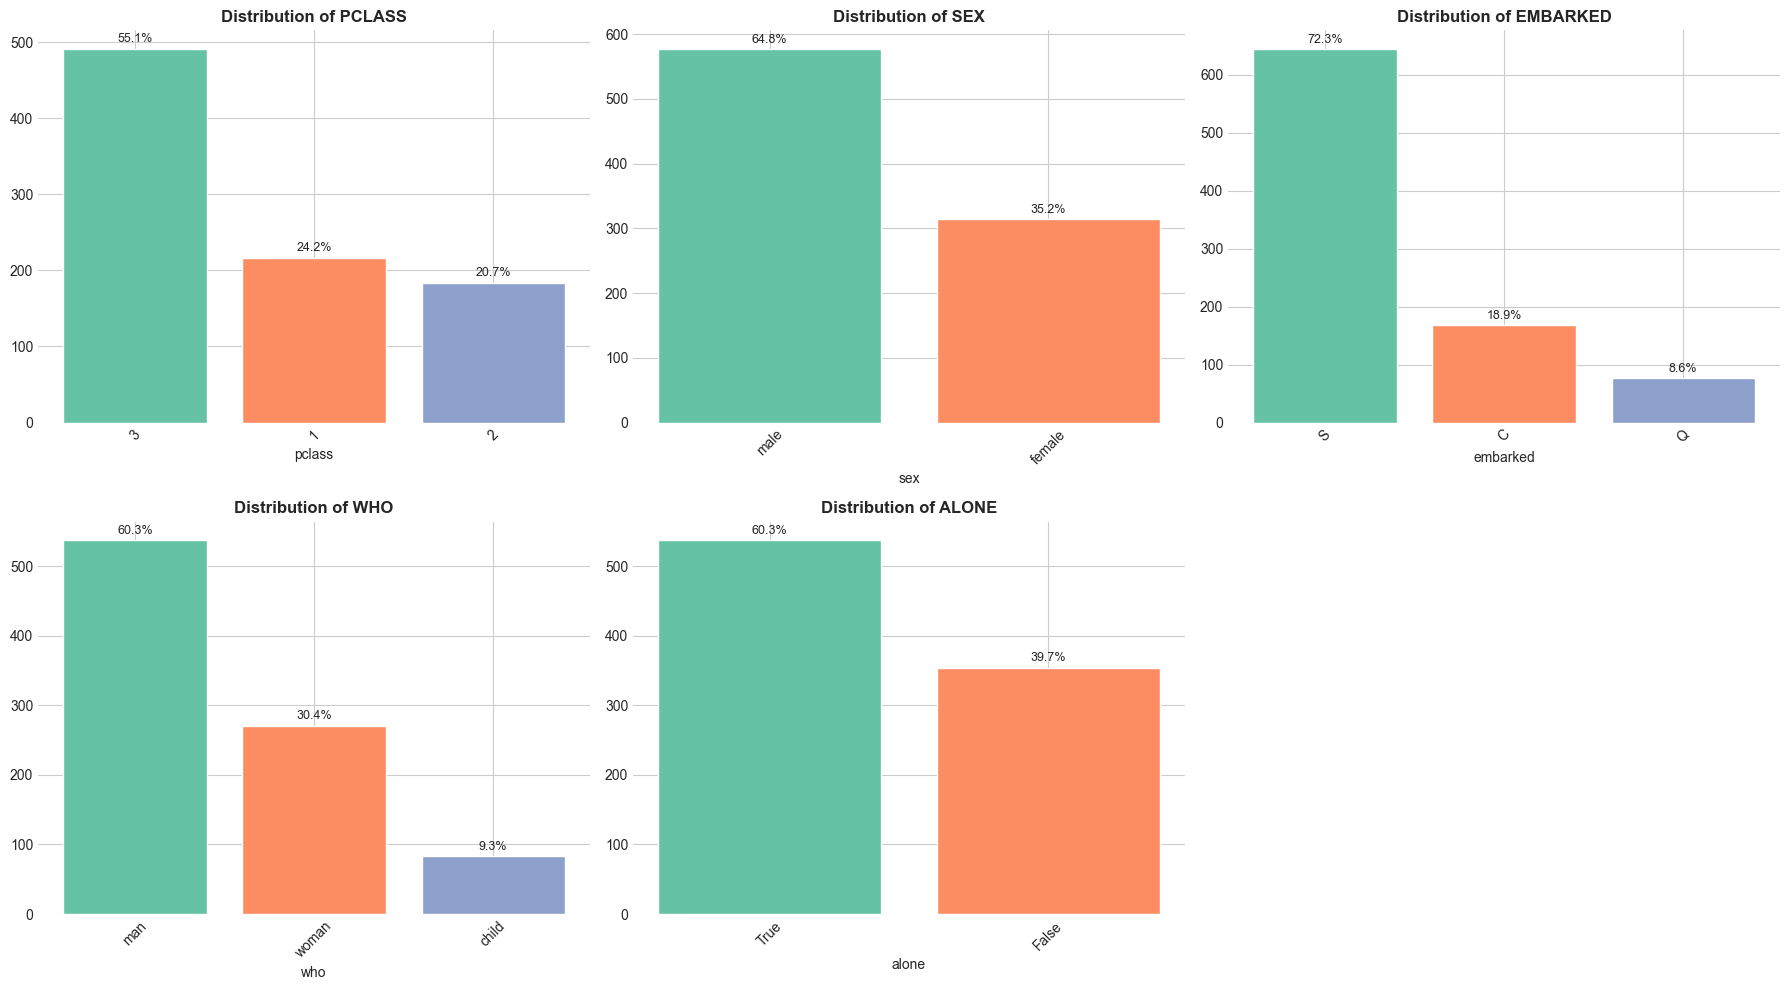

In [15]:
print("=== CATEGORICAL FEATURES ANALYSIS ===")

cat_cols = ['pclass', 'sex', 'embarked', 'who', 'alone']
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for idx, col in enumerate(cat_cols):
    value_counts = df[col].value_counts()
    bars = axes[idx].bar(value_counts.index.astype(str), value_counts.values, 
                        color=sns.color_palette("Set2"))
    axes[idx].set_title(f'Distribution of {col.upper()}', fontweight='bold')
    axes[idx].set_xlabel(col)
    axes[idx].tick_params(axis='x', rotation=45)
    
    # Add percentages on bars
    total = len(df)
    for bar, count in zip(bars, value_counts.values):
        height = bar.get_height()
        percent = (count/total)*100
        axes[idx].text(bar.get_x() + bar.get_width()/2., height + 5,
                      f'{percent:.1f}%', ha='center', va='bottom', fontsize=9)
    
    print(f"\n{col.upper()}:")
    for val, count in value_counts.items():
        print(f"  {val}: {count} ({count/len(df)*100:.1f}%)")

# Hide the last subplot if not needed
if len(cat_cols) < 6:
    axes[-1].axis('off')

plt.tight_layout()
plt.show()

=== RELATIONSHIP WITH SURVIVAL ===


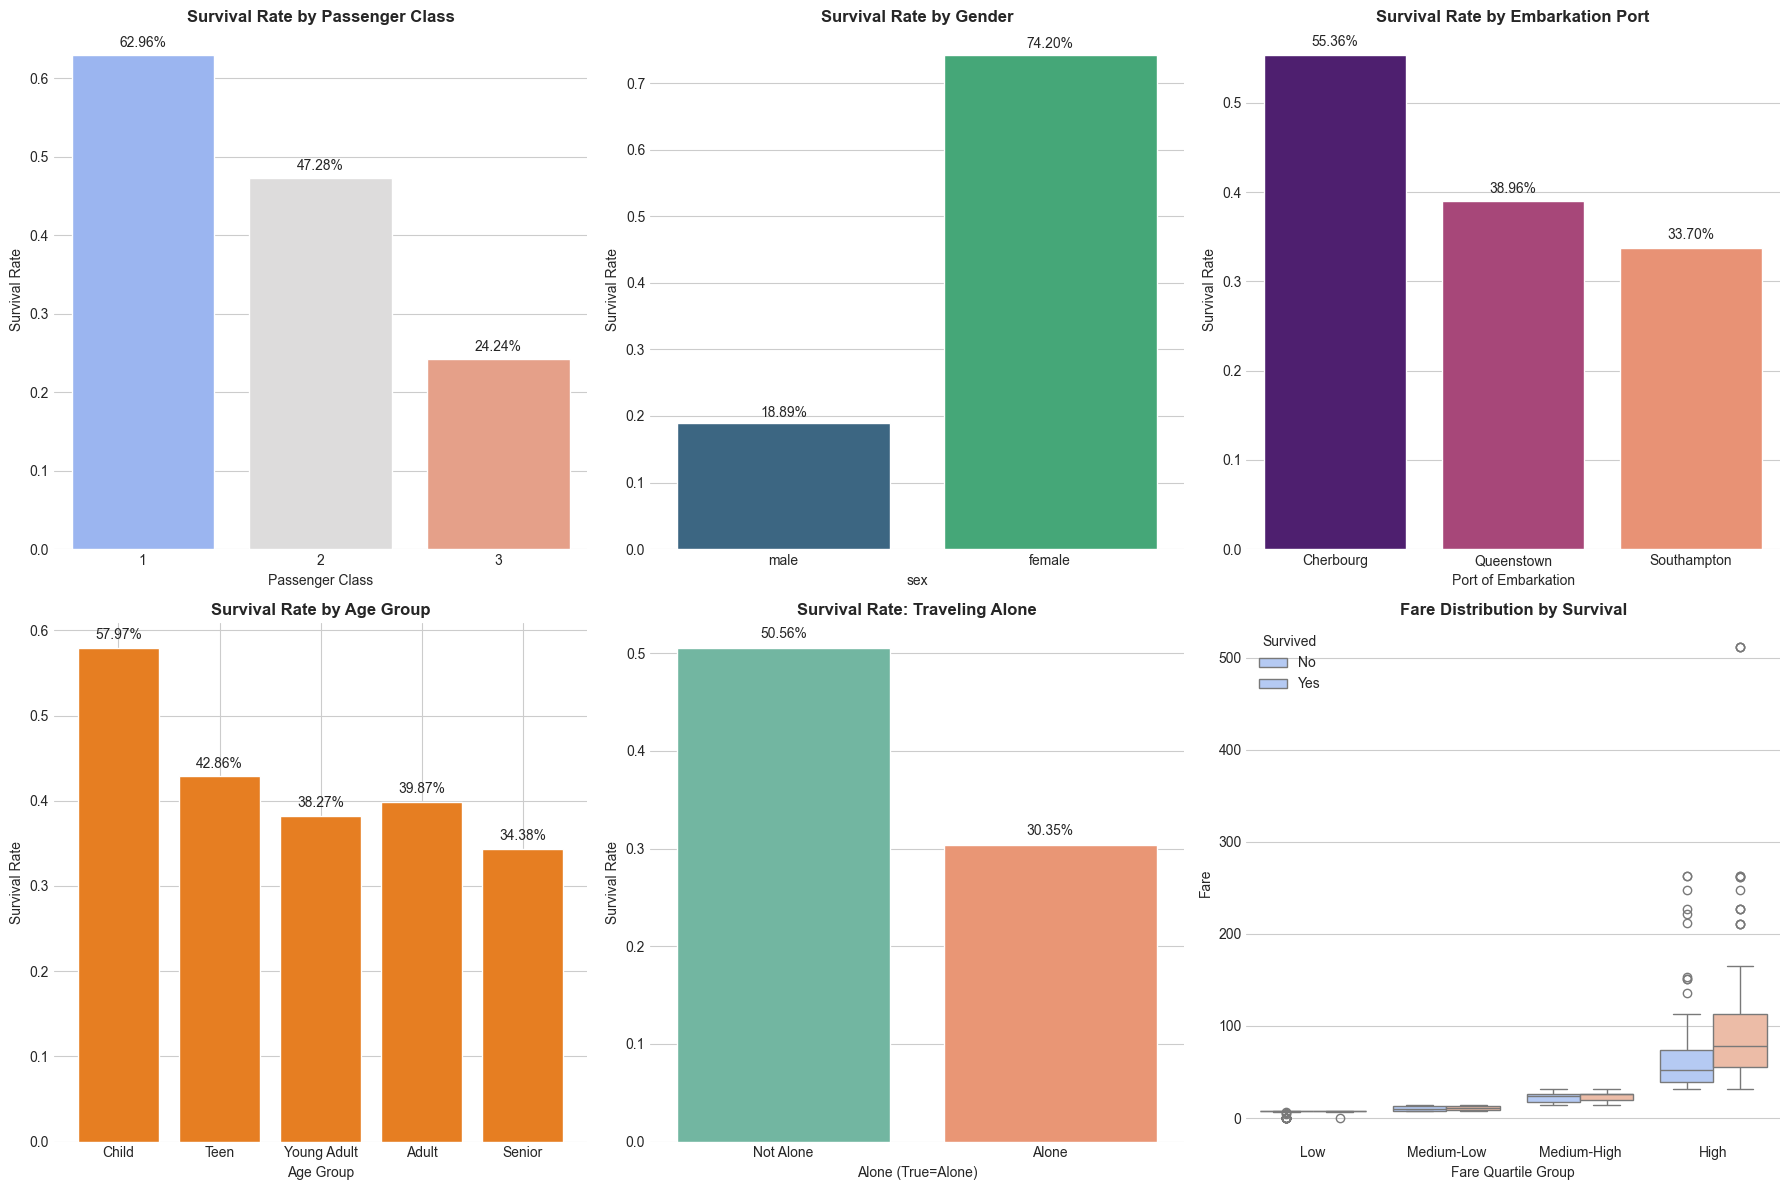

In [16]:
print("=== RELATIONSHIP WITH SURVIVAL ===")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Survival by Passenger Class
sns.barplot(data=df, x='pclass', y='survived', ax=axes[0,0], 
            palette='coolwarm', errorbar=None)
axes[0,0].set_title('Survival Rate by Passenger Class', fontweight='bold')
axes[0,0].set_ylabel('Survival Rate')
axes[0,0].set_xlabel('Passenger Class')
for i, p in enumerate(axes[0,0].patches):
    axes[0,0].text(p.get_x() + p.get_width()/2., p.get_height() + 0.01,
                  f'{p.get_height():.2%}', ha='center')

# 2. Survival by Gender
sns.barplot(data=df, x='sex', y='survived', ax=axes[0,1], 
            palette='viridis', errorbar=None)
axes[0,1].set_title('Survival Rate by Gender', fontweight='bold')
axes[0,1].set_ylabel('Survival Rate')
for i, p in enumerate(axes[0,1].patches):
    axes[0,1].text(p.get_x() + p.get_width()/2., p.get_height() + 0.01,
                  f'{p.get_height():.2%}', ha='center')

# 3. Survival by Embarkation Port
sns.barplot(data=df, x='embark_town', y='survived', ax=axes[0,2], 
            palette='magma', errorbar=None, order=['Cherbourg', 'Queenstown', 'Southampton'])
axes[0,2].set_title('Survival Rate by Embarkation Port', fontweight='bold')
axes[0,2].set_ylabel('Survival Rate')
axes[0,2].set_xlabel('Port of Embarkation')
for i, p in enumerate(axes[0,2].patches):
    axes[0,2].text(p.get_x() + p.get_width()/2., p.get_height() + 0.01,
                  f'{p.get_height():.2%}', ha='center')

# 4. Survival by Age Groups
df['age_group'] = pd.cut(df['age'], bins=[0, 12, 18, 35, 50, 80], 
                         labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Senior'])
survival_by_age = df.groupby('age_group')['survived'].mean().sort_index()
axes[1,0].bar(survival_by_age.index.astype(str), survival_by_age.values, color='#e67e22')
axes[1,0].set_title('Survival Rate by Age Group', fontweight='bold')
axes[1,0].set_ylabel('Survival Rate')
axes[1,0].set_xlabel('Age Group')
for i, (idx, val) in enumerate(survival_by_age.items()):
    axes[1,0].text(i, val + 0.01, f'{val:.2%}', ha='center')

# 5. Survival by Traveling Alone
sns.barplot(data=df, x='alone', y='survived', ax=axes[1,1], 
            palette='Set2', errorbar=None)
axes[1,1].set_title('Survival Rate: Traveling Alone', fontweight='bold')
axes[1,1].set_ylabel('Survival Rate')
axes[1,1].set_xlabel('Alone (True=Alone)')
axes[1,1].set_xticklabels(['Not Alone', 'Alone'])
for i, p in enumerate(axes[1,1].patches):
    axes[1,1].text(p.get_x() + p.get_width()/2., p.get_height() + 0.01,
                  f'{p.get_height():.2%}', ha='center')

# 6. Survival by Fare (Box plot)
df['fare_group'] = pd.qcut(df['fare'], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])
sns.boxplot(data=df, x='fare_group', y='fare', hue='survived', ax=axes[1,2], palette='coolwarm')
axes[1,2].set_title('Fare Distribution by Survival', fontweight='bold')
axes[1,2].set_xlabel('Fare Quartile Group')
axes[1,2].set_ylabel('Fare')
axes[1,2].legend(title='Survived', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

=== CORRELATION ANALYSIS ===
Available numerical columns:
['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

Using features for correlation: ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare']

Correlation Matrix:
          survived  pclass    age  sibsp  parch   fare
survived     1.000  -0.338 -0.077 -0.035  0.082  0.257
pclass      -0.338   1.000 -0.369  0.083  0.018 -0.549
age         -0.077  -0.369  1.000 -0.308 -0.189  0.096
sibsp       -0.035   0.083 -0.308  1.000  0.415  0.160
parch        0.082   0.018 -0.189  0.415  1.000  0.216
fare         0.257  -0.549  0.096  0.160  0.216  1.000


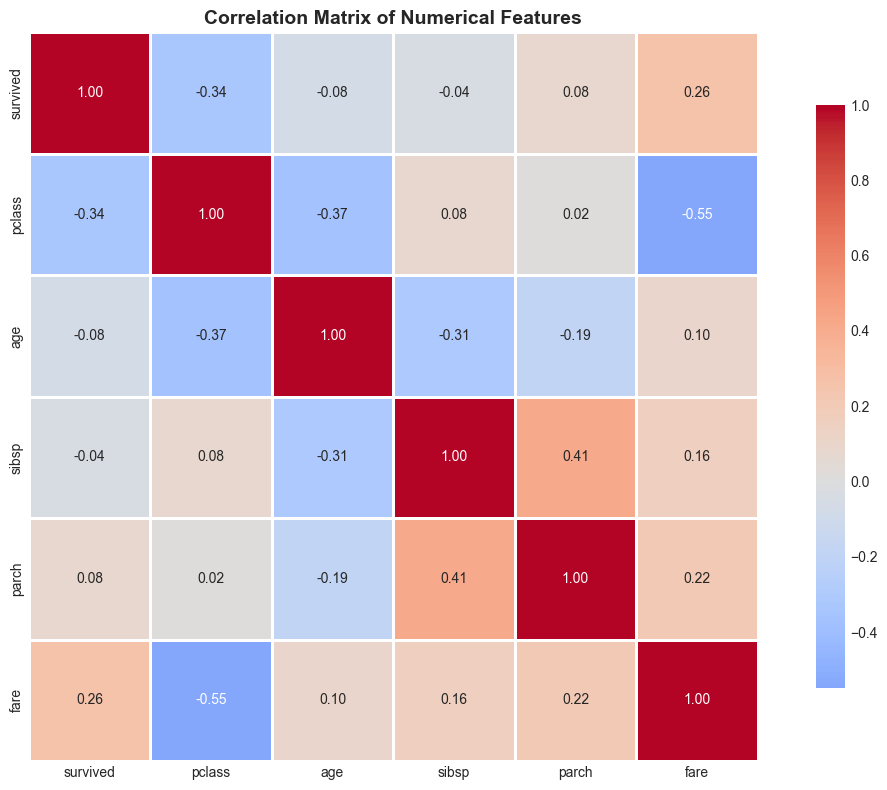


📈 Top Features Correlated with Survival:

Positive correlation (higher value = more likely to survive):
  ➕ fare: 0.257
  ➕ parch: 0.082

Negative correlation (higher value = less likely to survive):
  ➖ sibsp: -0.035
  ➖ age: -0.077
  ➖ pclass: -0.338

Near-zero correlation (little relationship with survival):
  ↔️  parch: 0.082
  ↔️  sibsp: -0.035
  ↔️  age: -0.077


In [18]:
print("=== CORRELATION ANALYSIS ===")

# First, check which numerical columns we have
print("Available numerical columns:")
print(df.select_dtypes(include=[np.number]).columns.tolist())

# Select numerical features for correlation
# Make sure has_deck exists
num_features = []
for col in ['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'has_deck']:
    if col in df.columns:
        num_features.append(col)
    else:
        print(f"Warning: {col} not found in dataframe")

print(f"\nUsing features for correlation: {num_features}")

# Calculate correlation matrix
corr_matrix = df[num_features].corr()

print("\nCorrelation Matrix:")
print(corr_matrix.round(3))

# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            fmt='.2f', annot_kws={'size': 10})
plt.title('Correlation Matrix of Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Top correlations with survival
print("\n📈 Top Features Correlated with Survival:")
survival_corr = corr_matrix['survived'].sort_values(ascending=False)
print("\nPositive correlation (higher value = more likely to survive):")
for feature, corr in survival_corr.items():
    if feature != 'survived' and corr > 0:
        print(f"  ➕ {feature}: {corr:.3f}")

print("\nNegative correlation (higher value = less likely to survive):")
for feature, corr in survival_corr.items():
    if feature != 'survived' and corr < 0:
        print(f"  ➖ {feature}: {corr:.3f}")

print("\nNear-zero correlation (little relationship with survival):")
for feature, corr in survival_corr.items():
    if feature != 'survived' and abs(corr) < 0.1:
        print(f"  ↔️  {feature}: {corr:.3f}")

=== FEATURE ENGINEERING INSIGHTS ===


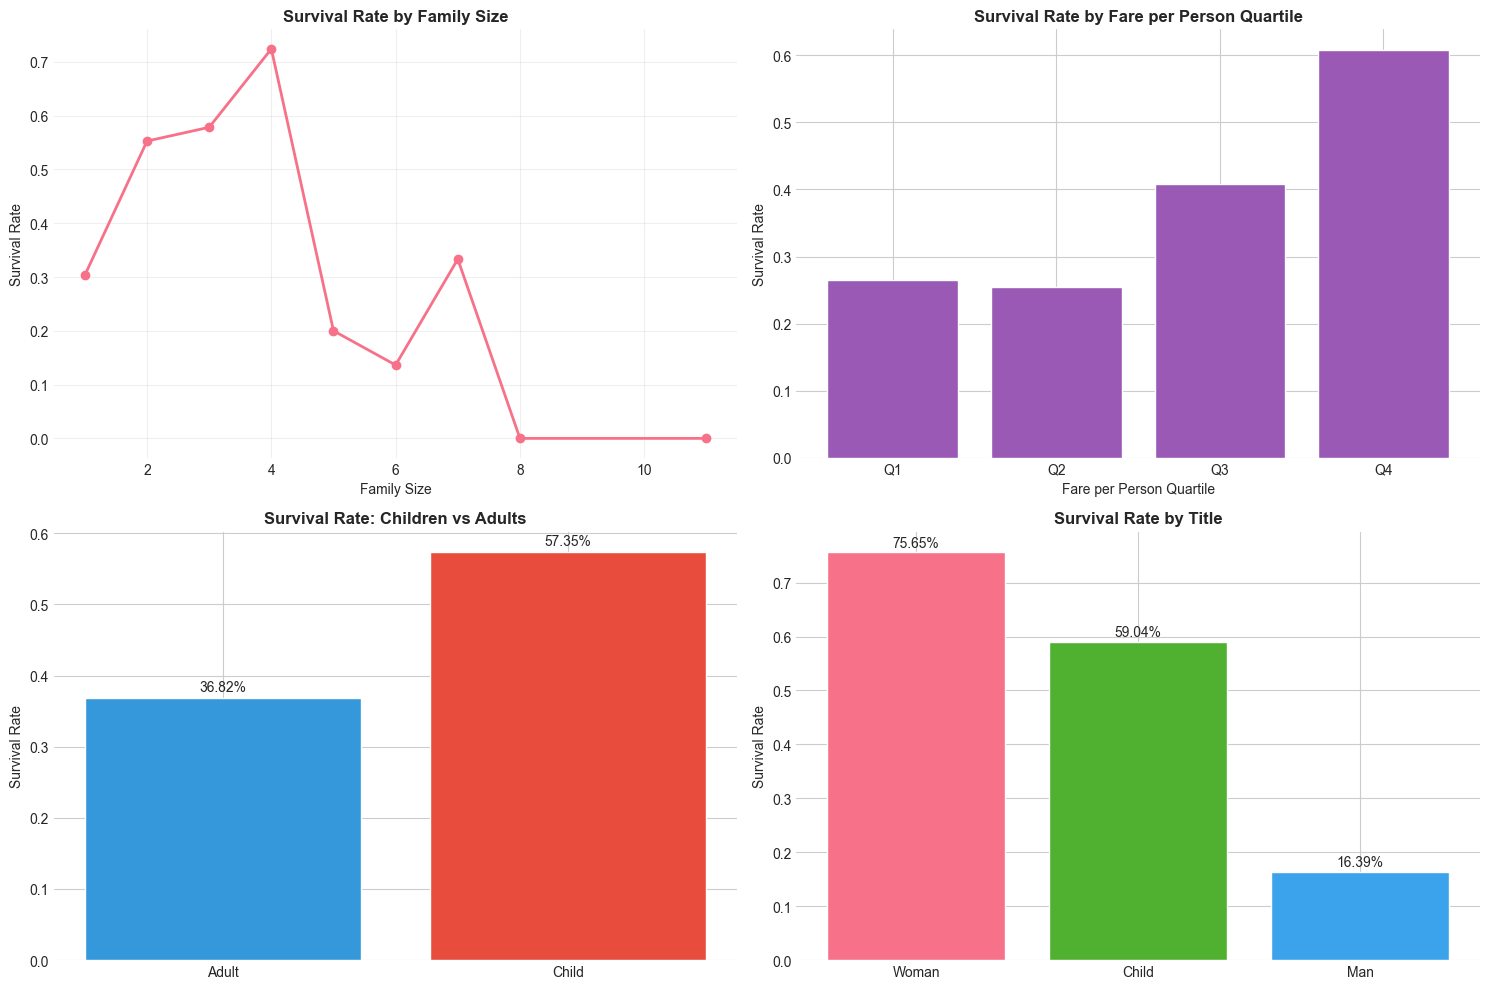

In [19]:
print("=== FEATURE ENGINEERING INSIGHTS ===")

# Create new features
df['family_size'] = df['sibsp'] + df['parch'] + 1
df['is_child'] = (df['age'] < 12).astype(int)
df['is_elderly'] = (df['age'] > 60).astype(int)
df['fare_per_person'] = df['fare'] / df['family_size']

# Analyze new features
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Family Size vs Survival
family_survival = df.groupby('family_size')['survived'].mean()
axes[0,0].plot(family_survival.index, family_survival.values, marker='o', linewidth=2)
axes[0,0].set_title('Survival Rate by Family Size', fontweight='bold')
axes[0,0].set_xlabel('Family Size')
axes[0,0].set_ylabel('Survival Rate')
axes[0,0].grid(True, alpha=0.3)

# Fare per person
df['fare_per_person_group'] = pd.qcut(df['fare_per_person'], q=4, 
                                      labels=['Q1', 'Q2', 'Q3', 'Q4'])
fare_survival = df.groupby('fare_per_person_group')['survived'].mean()
axes[0,1].bar(fare_survival.index.astype(str), fare_survival.values, color='#9b59b6')
axes[0,1].set_title('Survival Rate by Fare per Person Quartile', fontweight='bold')
axes[0,1].set_xlabel('Fare per Person Quartile')
axes[0,1].set_ylabel('Survival Rate')

# Children vs Adults
child_survival = df.groupby('is_child')['survived'].mean()
axes[1,0].bar(['Adult', 'Child'], child_survival.values, color=['#3498db', '#e74c3c'])
axes[1,0].set_title('Survival Rate: Children vs Adults', fontweight='bold')
axes[1,0].set_ylabel('Survival Rate')
for i, val in enumerate(child_survival.values):
    axes[1,0].text(i, val + 0.01, f'{val:.2%}', ha='center')

# Title extraction (Mr, Mrs, Miss, etc.)
df['title'] = df['who'].str.capitalize()
title_survival = df.groupby('title')['survived'].mean().sort_values(ascending=False)
axes[1,1].bar(title_survival.index, title_survival.values, color=sns.color_palette("husl", 3))
axes[1,1].set_title('Survival Rate by Title', fontweight='bold')
axes[1,1].set_ylabel('Survival Rate')
for i, (idx, val) in enumerate(title_survival.items()):
    axes[1,1].text(i, val + 0.01, f'{val:.2%}', ha='center')

plt.tight_layout()
plt.show()

In [20]:
print("="*60)
print("TITANIC EDA - KEY INSIGHTS SUMMARY")
print("="*60)

# Overall statistics
print(f"\n1. DATASET OVERVIEW:")
print(f"   Total passengers: {len(df)}")
print(f"   Survival rate: {df['survived'].mean()*100:.1f}%")
print(f"   Features analyzed: {len(df.columns)}")

print(f"\n2. KEY SURVIVAL FACTORS:")
print(f"   Gender: Female ({df[df['sex']=='female']['survived'].mean()*100:.1f}%) vs "
      f"Male ({df[df['sex']=='male']['survived'].mean()*100:.1f}%)")
print(f"   Passenger Class: 1st ({df[df['pclass']==1]['survived'].mean()*100:.1f}%) vs "
      f"2nd ({df[df['pclass']==2]['survived'].mean()*100:.1f}%) vs "
      f"3rd ({df[df['pclass']==3]['survived'].mean()*100:.1f}%)")
print(f"   Embarkation: Cherbourg ({df[df['embark_town']=='Cherbourg']['survived'].mean()*100:.1f}%) vs "
      f"Southampton ({df[df['embark_town']=='Southampton']['survived'].mean()*100:.1f}%)")

print(f"\n3. DEMOGRAPHICS:")
print(f"   Average age: {df['age'].mean():.1f} years")
print(f"   Children (<12): {df['is_child'].sum()} ({df['is_child'].mean()*100:.1f}%)")
print(f"   Traveling alone: {df['alone'].sum()} ({df['alone'].mean()*100:.1f}%)")

print(f"\n4. FEATURES STRONGLY CORRELATED WITH SURVIVAL:")
corr_with_survival = df.select_dtypes(include=[np.number]).corr()['survived'].sort_values(ascending=False)
top_features = corr_with_survival[1:4]  # Top 3 excluding survival itself
for feature, corr in top_features.items():
    direction = "positively" if corr > 0 else "negatively"
    print(f"   {feature}: {direction} correlated (r = {corr:.3f})")

print(f"\n5. RECOMMENDATIONS FOR ML MODELING:")
print(f"   - Use pclass, sex, age, fare as key features")
print(f"   - Consider creating interaction terms (e.g., gender × class)")
print(f"   - Handle outliers in fare")
print(f"   - Encode categorical variables (sex, embarked)")
print(f"   - Consider family-based features")

# Save cleaned dataset
df.to_csv('titanic_cleaned.csv', index=False)
print(f"\n6. OUTPUT:")
print(f"   Cleaned dataset saved as 'titanic_cleaned.csv'")
print(f"   Original shape: {sns.load_dataset('titanic').shape}")
print(f"   Cleaned shape: {df.shape}")

TITANIC EDA - KEY INSIGHTS SUMMARY

1. DATASET OVERVIEW:
   Total passengers: 891
   Survival rate: 38.4%
   Features analyzed: 23

2. KEY SURVIVAL FACTORS:
   Gender: Female (74.2%) vs Male (18.9%)
   Passenger Class: 1st (63.0%) vs 2nd (47.3%) vs 3rd (24.2%)
   Embarkation: Cherbourg (55.4%) vs Southampton (33.7%)

3. DEMOGRAPHICS:
   Average age: 29.7 years
   Children (<12): 68 (7.6%)
   Traveling alone: 537 (60.3%)

4. FEATURES STRONGLY CORRELATED WITH SURVIVAL:
   fare: positively correlated (r = 0.257)
   fare_per_person: positively correlated (r = 0.222)
   is_child: positively correlated (r = 0.112)

5. RECOMMENDATIONS FOR ML MODELING:
   - Use pclass, sex, age, fare as key features
   - Consider creating interaction terms (e.g., gender × class)
   - Handle outliers in fare
   - Encode categorical variables (sex, embarked)
   - Consider family-based features

6. OUTPUT:
   Cleaned dataset saved as 'titanic_cleaned.csv'
   Original shape: (891, 15)
   Cleaned shape: (891, 23)


In [21]:
def titanic_quick_eda(df):
    """Quick EDA function for Titanic dataset"""
    
    print("🚢 TITANIC QUICK EDA")
    print("="*50)
    
    # Survival rate
    survival_rate = df['survived'].mean() * 100
    print(f"\n📊 Overall Survival Rate: {survival_rate:.1f}%")
    
    # Key factors
    print("\n🔑 Key Survival Factors:")
    for col in ['sex', 'pclass', 'embarked']:
        if col in df.columns:
            survival_by = df.groupby(col)['survived'].mean() * 100
            print(f"\n{col.upper()}:")
            for val, rate in survival_by.items():
                print(f"  {val}: {rate:.1f}%")
    
    # Missing values
    print(f"\n⚠️  Missing Values: {df.isnull().sum().sum()}")
    missing_cols = df.columns[df.isnull().any()].tolist()
    if missing_cols:
        print(f"   Columns with missing values: {missing_cols}")
    
    return {
        'survival_rate': survival_rate,
        'total_passengers': len(df),
        'features': list(df.columns),
        'missing_values': df.isnull().sum().sum()
    }

# Run quick analysis
results = titanic_quick_eda(df)

🚢 TITANIC QUICK EDA

📊 Overall Survival Rate: 38.4%

🔑 Key Survival Factors:

SEX:
  female: 74.2%
  male: 18.9%

PCLASS:
  1: 63.0%
  2: 47.3%
  3: 24.2%

EMBARKED:
  C: 55.4%
  Q: 39.0%
  S: 33.7%

⚠️  Missing Values: 1046
   Columns with missing values: ['age', 'embarked', 'deck', 'embark_town', 'age_group']
